## Optimización

La optimización es el proceso que hace que la red neuronal se vuelva cada vez mejor en la tarea, o sea, que aprenda. El objetivo de las redes neuronales es simple, minimizar la **función de pérdida**.

### Función de pérdida

La función de pérdida nos indica qué tan bien se hizo la tarea, nos dice el error cometido por la red. La función de pérdida más común para las redes neuronales es la **categorical cross-entropy** que para un ejemplo $x_i$ se define como:

$$ L_i(y_i, \hat{y}_i)= -\sum_{j=1}^Cy_i^{(j)}\log(\hat{y}_i^{(j)})$$

donde $C$ es el número de clases, $\hat{y}_i$ es la predicción del modelo para el ejemplo $x_i$ y $y_i$ es la etiqueta asiganada a $x_i$. La pérdida total es el promedio sobre todos los elementos del conjunto de datos.

$$ L = \frac{1}{m}\sum_{i=1}^mL_i(\hat{y}_i,y_i)$$

donde $m$ es el número de ejemplos.







In [ ]:
from tensorflow import keras
import numpy as np

y_true = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1]])
y_pred = np.array([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [.8, .1, .1], [0.01, 0.01, 0.98]])

loss = keras.losses.categorical_crossentropy(y_true, y_pred).numpy()
print(f"Pérdidas individuales: {loss}, promedio: {np.mean(loss)}")

Pérdidas individuales: [0.22314355 0.35667494 2.30258509 0.02020271], promedio: 0.7256515738911267


Entonces, el objetivo es obtener las predicciones que hagan que $L$ sea lo más pequeña posible. Las predicciones son una función del ejemplo $x_i$ y de los pesos del modelo $W$. Esto es

$$ \hat y_i=f(x_i;W)$$

Para minimizar $L$, se usa la técnica de optimización **Descenso de gradiente** que consiste en sacar el gradiente de $L$ y modificar los pesos en la dirección opuesta. El siguiente código representa a la variante **Descenso de gradiente estocástico** (SGD) donde se parte el conjunto en lotes de datos y actualiza los pesos una vez por cada lote.

```
for batch in data:
    g = grad(L, batch, W)
    W += -lr * g
```
En este código aparece el parámetro `lr` que se llama **learning rate** que nos dice el tamaño del vector con que actualizaremos los pesos. El learning rate es un parámetro importante que debemos elegir antes de entrenar los modelos.

- Un learning rate muy pequeño hará que el entrenamiento tarde en converger.
- Uno muy grande puede hacer que la pérdida nunca disminuya de manera consistente.
- Un learning rate propiado disminuirá la pérdida de manera constante.

Veamos un ejemplo de entrenamiento con varios learning rates.

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers

import numpy as np
from sklearn.metrics import classification_report


In [ ]:
(train, train_labels), (test, test_labels) = mnist.load_data()
train, val, train_labels, val_labels = train_test_split(train, train_labels, test_size=0.1, random_state=42)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train = train.reshape((54000, 28 * 28))
train = train.astype('float32') / 255
val = val.reshape((6000, 28 * 28))
val = val.astype('float32') / 255
test = test.reshape((10000, 28 * 28))
test = test.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)

In [ ]:
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(128, activation='sigmoid', input_shape=(28 * 28,)))
    network.add(layers.Dense(128, activation='sigmoid'))
    network.add(layers.Dense(10, activation='softmax'))
    return network

In [ ]:
def plot_results(complete_history, legend):
    for opt in complete_history:
        plt.plot(complete_history[opt].history['val_accuracy'])
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(legend, loc='upper left')
    plt.show()
    for opt in complete_history:
        plt.plot(complete_history[opt].history['val_loss'])
        plt.yscale('log')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(legend, loc='upper left')
    plt.show()

## Variar el Learning Rate

In [ ]:
lrs = [100., 1., .1, .001]
complete_history = {}
for lr in lrs:
    print("Entrenando con learning rate:", lr)

    network = create_network()
    network.compile(optimizer=optimizers.SGD(learning_rate=lr),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = network.fit(train, train_labels, validation_data=(val, val_labels), epochs=5, batch_size=128)
    complete_history[lr] = history


Entrenando con learning rate: 100.0
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1022 - loss: 880.9357 - val_accuracy: 0.0918 - val_loss: 879.1912
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0988 - loss: 814.0910 - val_accuracy: 0.0918 - val_loss: 959.6672
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0977 - loss: 818.9393 - val_accuracy: 0.1053 - val_loss: 509.4362
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1001 - loss: 810.5908 - val_accuracy: 0.0975 - val_loss: 1138.2299
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0996 - loss: 794.7347 - val_accuracy: 0.0967 - val_loss: 884.8460
Entrenando con learning rate: 1.0
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5664 - loss: 1.3595 - val_accuracy: 0.9043 - val_loss: 0.3272
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9108 - loss: 0.2992 - val_accuracy: 0.9285 - val_loss: 0.2367
Epoch 3/5
422/422 ━

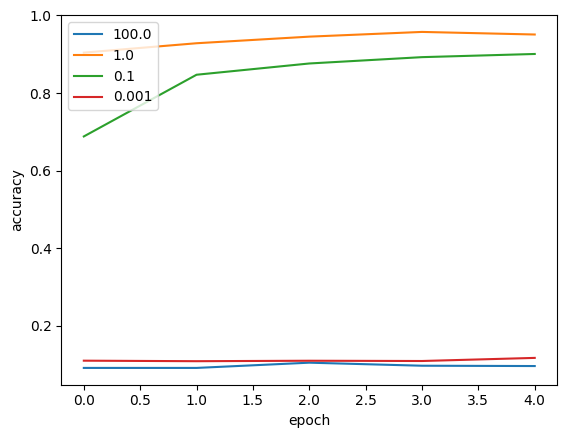

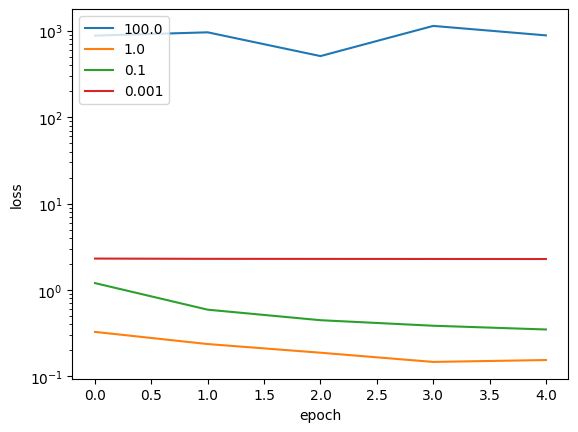

In [ ]:
plot_results(complete_history, legend=lrs)

## Diferentes Optimizadores

Además del SGD, existen variantes donde se toma en cuenta el **momentum** del descenso para encontrar un mejor mínimo.

In [ ]:
lr = 0.001

sgd = [optimizers.SGD(learning_rate=lr), "SGD"]
momentum = [optimizers.SGD(learning_rate=lr, momentum=0.9), "Momentum"]
rmsprop = [optimizers.RMSprop(learning_rate=lr), "RMSProp"]
adam = [optimizers.Adam(learning_rate=lr), "Adam"]
OPTIMIZERS = [sgd, momentum, rmsprop, adam]

complete_history = {}
predictions = []
for opt in OPTIMIZERS:
    print("Training:", opt[1])

    network = create_network()
    network.compile(optimizer=opt[0],
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = network.fit(train, train_labels, validation_data=(val, val_labels), epochs=10, batch_size=128)
    complete_history[opt[1]] = history
    pred = network.predict(test)
    predictions.append(pred)



Training: SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1030 - loss: 2.3043 - val_accuracy: 0.2640 - val_loss: 2.1669
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.3406 - loss: 2.1194 - val_accuracy: 0.5155 - val_loss: 1.9800
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5528 - loss: 1.9224 - val_accuracy: 0.6297 - val_loss: 1.7597
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6511 - loss: 1.6934 - val_accuracy: 0.6805 - val_loss: 1.5219
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6982 - loss: 1.4573 - val_accuracy: 0.7158 - val_loss: 1.3000
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7378 - loss: 1.2407 - val_accuracy: 0.7492 - val_loss: 1.1178
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7587 - loss: 1.0760 - val_accuracy: 0.7707 - val_loss: 0.9783
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7817 - loss: 0.9429 - val_accuracy: 0.

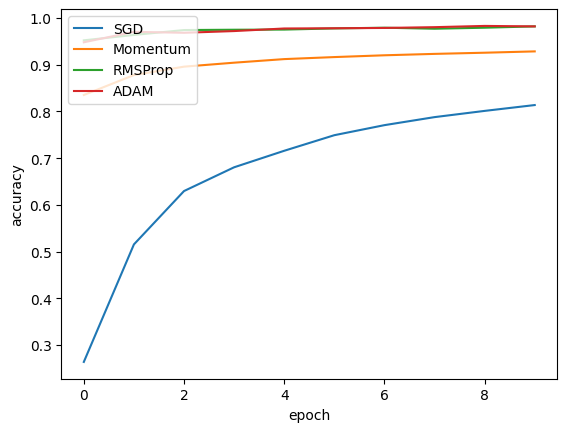

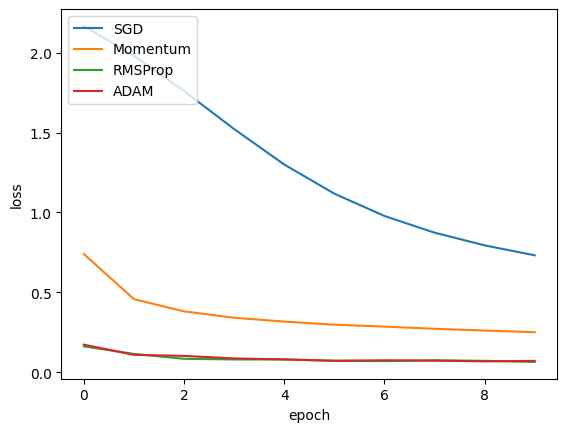

In [ ]:
plot_results(complete_history, legend=['SGD', 'Momentum', 'RMSProp', 'ADAM'])

In [ ]:
for p, opt in zip(predictions, OPTIMIZERS):
    print("=" * 50)
    print("Resultados de", opt[1])
    print(classification_report(test_labels, np.argmax(p, axis=1), digits=4))

Resultados de SGD
              precision    recall  f1-score   support

           0     0.8829    0.9388    0.9100       980
           1     0.8877    0.9753    0.9295      1135
           2     0.8615    0.8014    0.8303      1032
           3     0.7987    0.8446    0.8210      1010
           4     0.7339    0.7413    0.7376       982
           5     0.8265    0.6570    0.7320       892
           6     0.8772    0.9019    0.8893       958
           7     0.8675    0.8599    0.8637      1028
           8     0.7981    0.7752    0.7865       974
           9     0.6986    0.7146    0.7065      1009

    accuracy                         0.8245     10000
   macro avg     0.8233    0.8210    0.8206     10000
weighted avg     0.8241    0.8245    0.8229     10000

Resultados de Momentum
              precision    recall  f1-score   support

           0     0.9368    0.9827    0.9592       980
           1     0.9737    0.9797    0.9767      1135
           2     0.9345    0.9128    